# Homework ML Zoomcamp Week 8

## Data

In this homework, we'll build a model for predicting if we have an image of a dino or a dragon. For this, we will use the "Dino or Dragon?" dataset that can be downloaded from Kaggle.

You can get a wget-able version here:

wget https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip

unzip dino-dragon.zip

## Modules

In [1]:
#import wget
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D

2022-11-19 16:17:13.619952: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## Import data

In [2]:
# Use wget
#wget.download('https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip')

In [3]:
# unzip data

#!unzip dino-dragon.zip

## Prepare data

The dataset contains around 1900 images of dinos and around 1900 images of dragons.

The dataset contains separate folders for training and validation.

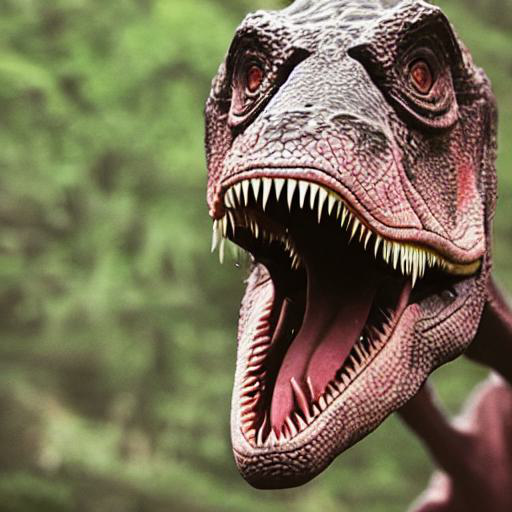

In [4]:
path =  './train/dino'
name = '014d6937-456a-4d13-bf79-2518ef128ff1.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [5]:
img = load_img(fullname, target_size=(299, 299))

In [6]:
x = np.array(img)
x.shape

(299, 299, 3)

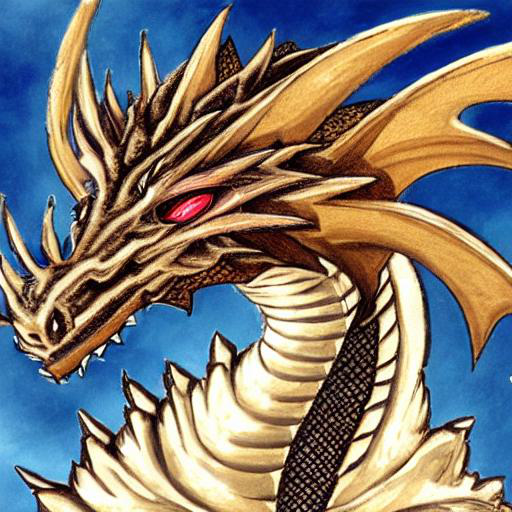

In [7]:
path =  './train/dragon'
name = '0226f61b-95d8-4aaf-9c4a-b1d2177edb38.jpg'
fullname2 = f'{path}/{name}'
load_img(fullname2)

In [8]:
img2 = load_img(fullname2, target_size=(299, 299))

In [9]:
y = np.array(img2)
y.shape

(299, 299, 3)

## Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

- The shape for input should be (150, 150, 3)

- Next, create a convolutional layer (Conv2D):
 - Use 32 filters
 - Kernel size should be (3, 3) (that's the size of the filter)
 - Use 'relu' as activation
- Reduce the size of the feature map with max pooling (MaxPooling2D)
 - Set the pooling size to (2, 2)
- Turn the multi-dimensional result into vectors using a Flatten layer
- Next, add a Dense layer with 64 neurons and 'relu' activation
- Finally, create the Dense layer with 1 neuron - this will be the output
 - The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use SGD with the following parameters:

SGD(lr=0.002, momentum=0.8)

In [10]:
# Preprocess pictures to a size of (150, 150, 3)

train_gen = ImageDataGenerator()

train_ds = train_gen.flow_from_directory(
    './train',
    target_size=(150, 150),
    batch_size=32
)

Found 1594 images belonging to 2 classes.


In [11]:
train_ds.class_indices

{'dino': 0, 'dragon': 1}

In [12]:
X, y = next(train_ds)
y[:5]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [13]:
# Create model

#inputs = keras.Input(shape=(150, 150, 3))
model = Sequential(name='CNN')

# Convolutional layer
model.add(Conv2D(32,(3,3),               
            input_shape = (150,150,3),
            activation='relu',
            name = 'conv'  ))

# MaxPooling
model.add(keras.layers.MaxPooling2D(pool_size=(2,2), name = 'maxpooling_1'))

# Flatten

model.add(Flatten(name='flatten'))

# Dense layer

model.add(Dense(64, activation='relu', name='dense'))

# Output layer
# for activation I use sigmoid for binary classifcation
model.add(Dense(1, activation='sigmoid', name='output'))



2022-11-19 16:17:21.773156: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-19 16:17:21.848894: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-19 16:17:21.849561: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-19 16:17:21.851598: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [14]:
optimizer = keras.optimizers.SGD(
    learning_rate=0.002, momentum=0.8)

loss = keras.losses.BinaryCrossentropy()


## Question 1

Since we have a binary classification problem, what is the best loss function for us?

- binary crossentropy
- focal loss
- mean squared error
- categorical crossentropy

Note: since we specify an activation for the output layer, we don't need to set from_logits=True

### Answer Question 1

The answer is: binary crossentropy, although possible would be hinge loss and squared hinge loss

## Question 2

What's the total number of parameters of the model? You can use the summary method for that.

In [15]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [16]:
model.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 148, 148, 32)      896       
                                                                 
 maxpooling_1 (MaxPooling2D)  (None, 74, 74, 32)       0         
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 output (Dense)              (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
_________________________________________________________________


### Answer Question 2

Total params: 11,215,873

Trainable params: 11,215,873

## Generators and Training

For the next two questions, use the following data generator for both train and validation:

- ImageDataGenerator(rescale=1./255)

- We don't need to do any additional pre-processing for the images.
- When reading the data from train/val directories, check the class_mode parameter. Which value should it be for a binary classification problem?
- Use batch_size=20
- Use shuffle=True for both training and validation
- For training use .fit() with the following params:

model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

In [17]:
# Generator for train
train_gen  =ImageDataGenerator(rescale=1./255)

# read data from directory
train_ds = train_gen.flow_from_directory(
    './train',
    target_size=(150, 150),
    batch_size=20,
    class_mode = 'binary',
    shuffle = True
)

Found 1594 images belonging to 2 classes.


In [18]:
# Generator for train
test_gen = ImageDataGenerator(rescale=1./255)

# read data from directory
test_ds = test_gen.flow_from_directory(
    './test',
    target_size=(150, 150),
    batch_size=20,
    class_mode = 'binary',
    shuffle = True
)

Found 394 images belonging to 2 classes.


In [19]:
# Train model
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10


2022-11-19 16:17:25.711623: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-11-19 16:17:27.626238: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-19 16:17:27.627168: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-19 16:17:27.627210: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-11-19 16:17:27.628272: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-19 16:17:27.628371: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


80/80 [==============================] - 15s 122ms/step - loss: 0.6316 - accuracy: 0.6462 - val_loss: 0.5877 - val_accuracy: 0.6320
Epoch 2/10
80/80 [==============================] - 9s 106ms/step - loss: 0.4913 - accuracy: 0.7716 - val_loss: 0.4377 - val_accuracy: 0.8249
Epoch 3/10
80/80 [==============================] - 8s 106ms/step - loss: 0.3935 - accuracy: 0.8338 - val_loss: 0.3787 - val_accuracy: 0.8401
Epoch 4/10
80/80 [==============================] - 9s 107ms/step - loss: 0.3532 - accuracy: 0.8645 - val_loss: 0.4282 - val_accuracy: 0.7970
Epoch 5/10
80/80 [==============================] - 8s 105ms/step - loss: 0.3085 - accuracy: 0.8808 - val_loss: 0.3314 - val_accuracy: 0.8604
Epoch 6/10
80/80 [==============================] - 8s 106ms/step - loss: 0.2757 - accuracy: 0.8952 - val_loss: 0.3144 - val_accuracy: 0.8782
Epoch 7/10
80/80 [==============================] - 9s 106ms/step - loss: 0.2424 - accuracy: 0.9072 - val_loss: 0.3264 - val_accuracy: 0.8503
Epoch 8/10
80/80

## Question 3

What is the median of training accuracy for all the epochs for this model?

In [20]:
val_acc = history.history['accuracy']

display('Median training_accuracy:', np.median(val_acc), round(np.median(val_acc),2))

'Median training_accuracy:'

0.8880175650119781

0.89

### Answer question 3

Median of training accuracy is 0.89 (proximate is 0.9)

## Question 4

What is the standard deviation of training loss for all the epochs for this model?

In [21]:
loss = history.history['loss']

display('Standard deviation', np.std(loss), round(np.std(loss),2))

'Standard deviation'

0.13711248871110518

0.14

### Answer Question 4

Standard deviation of training loss is 0.14 (proximate 0.11)

## Data Augmentation

For the next two questions, we'll generate more data using data augmentations.

Add the following augmentations to your training data generator:

- rotation_range=40,
- width_shift_range=0.2,
- height_shift_range=0.2,
- shear_range=0.2,
- zoom_range=0.2,
- horizontal_flip=True,
- fill_mode='nearest'

In [22]:
train_aug_gen = ImageDataGenerator(rescale=1./255,
                                   rotation_range = 40, 
                               width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')

train_aug_ds = train_aug_gen.flow_from_directory(
    './train',
    target_size=(150, 150),
    batch_size=20,
    class_mode = 'binary',
    shuffle = True
)

Found 1594 images belonging to 2 classes.


## Question 5

Let's train our model for 10 more epochs using the same code as previously. Make sure you don't re-create the model - we want to continue training the model we already started training.

What is the mean of validation loss for all the epochs for the model trained with augmentations?

In [23]:
history_aug = model.fit(
    train_aug_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
80/80 [==============================] - 15s 191ms/step - loss: 0.4539 - accuracy: 0.7804 - val_loss: 0.2959 - val_accuracy: 0.8604
Epoch 2/10
80/80 [==============================] - 15s 189ms/step - loss: 0.4150 - accuracy: 0.8118 - val_loss: 0.3580 - val_accuracy: 0.8299
Epoch 3/10
80/80 [==============================] - 15s 188ms/step - loss: 0.4251 - accuracy: 0.7967 - val_loss: 0.2620 - val_accuracy: 0.8883
Epoch 4/10
80/80 [==============================] - 15s 189ms/step - loss: 0.4014 - accuracy: 0.8269 - val_loss: 0.2807 - val_accuracy: 0.8706
Epoch 5/10
80/80 [==============================] - 15s 188ms/step - loss: 0.3786 - accuracy: 0.8381 - val_loss: 0.6153 - val_accuracy: 0.7462
Epoch 6/10
80/80 [==============================] - 15s 189ms/step - loss: 0.3790 - accuracy: 0.8363 - val_loss: 0.3699 - val_accuracy: 0.8249
Epoch 7/10
80/80 [==============================] - 15s 189ms/step - loss: 0.3796 - accuracy: 0.8369 - val_loss: 0.4240 - val_accuracy: 0.8223

In [24]:
val_loss_aug = history_aug.history['val_loss']

display('Mean validaton loss', np.mean(val_loss_aug), round(np.mean(val_loss_aug),2))

'Mean validaton loss'

0.4056192755699158

0.41

In [26]:
np.mean(history_aug.history['loss'])

0.3879494696855545

### Answer Question 5

The mean of validation loss ist 0,41, of test loss is 0.39. Nearest is 0.37.

## Question 6

What's the average of validation accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

In [25]:
val_acc_aug =  history_aug.history['val_accuracy']

display('Mean validaton accuray (6-10)', np.mean(val_acc_aug[5:]), round(np.mean(val_acc_aug[5:]),2))

'Mean validaton accuray (6-10)'

0.8131979584693909

0.81

In [27]:
np.mean(history_aug.history['accuracy'][5:])

0.8432873249053955

### Answer Question 6

The mean validation accuracy for the last 5 epohs is 0.81. Nearest is 0.84